# EV Charging Demand Prediction

This notebook builds a machine learning model to predict EV charging demand (energy consumption in kWh) based on historical charging data.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Load the dataset
def load_data(file_path):
    """Load and perform initial processing of the EV charging data."""
    df = pd.read_excel(file_path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Convert Time Elapsed from seconds to hours
    df['Charging_Duration_h'] = df['Time Elapsed_s'] / 3600
    return df

# Load the data
df = load_data('ev_charging_data2.xlsx')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3007, 12)


,Timestamp,State Of Charge_SoC,Charging Power_kW,Charging Voltage_V,Charging Current_A,Battery Temperature_C,Vehicle Speed_kmh,Regenerative Power_kW,Energy Supplied_kWh,Motor RPM,Time Elapsed_s,Charging_Duration_h
0,2025-02-20 03:26:00,20.000,3.338,210.142,15.886,35.284,119.279,0.0,0.005,2704.401,0.0,0.000000
1,2025-02-20 03:26:00,20.009,3.146,283.815,11.085,39.649,15.100,0.0,0.009,4809.047,5.0,0.001389
2,2025-02-20 03:26:00,20.024,5.395,271.956,19.839,39.122,44.706,0.0,0.016,5966.568,10.0,0.002778
3,2025-02-20 03:26:00,20.039,5.494,275.876,19.914,36.359,43.506,0.0,0.024,4185.692,15.0,0.004167
4,2025-02-20 03:26:00,20.056,6.242,415.601,15.019,22.151,21.526,0.0,0.033,5659.455,20.0,0.005556


In [3]:
# Load the dataset
def load_data(file_path):
    """Load and perform initial processing of the EV charging data."""
    df = pd.read_excel(file_path)
    print("Available columns:", df.columns.tolist())
    return df

# Load the data
df = load_data('ev_charging_data2.xlsx')
print("\nDataset shape:", df.shape)
df.head()

Available columns: ['Timestamp', 'State Of Charge_SoC', 'Charging Power_kW', 'Charging Voltage_V', 'Charging Current_A', 'Battery Temperature_C', 'Vehicle Speed_kmh', 'Regenerative Power_kW', 'Energy Supplied_kWh', 'Motor RPM', 'Time Elapsed_s']

Dataset shape: (3007, 11)


,Timestamp,State Of Charge_SoC,Charging Power_kW,Charging Voltage_V,Charging Current_A,Battery Temperature_C,Vehicle Speed_kmh,Regenerative Power_kW,Energy Supplied_kWh,Motor RPM,Time Elapsed_s
0,2025-02-20 03:26:00,20.000,3.338,210.142,15.886,35.284,119.279,0.0,0.005,2704.401,0.0
1,2025-02-20 03:26:00,20.009,3.146,283.815,11.085,39.649,15.100,0.0,0.009,4809.047,5.0
2,2025-02-20 03:26:00,20.024,5.395,271.956,19.839,39.122,44.706,0.0,0.016,5966.568,10.0
3,2025-02-20 03:26:00,20.039,5.494,275.876,19.914,36.359,43.506,0.0,0.024,4185.692,15.0
4,2025-02-20 03:26:00,20.056,6.242,415.601,15.019,22.151,21.526,0.0,0.033,5659.455,20.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              3007 non-null   datetime64[ns]
 1   State Of Charge_SoC    3007 non-null   float64       
 2   Charging Power_kW      3007 non-null   float64       
 3   Charging Voltage_V     3007 non-null   float64       
 4   Charging Current_A     3007 non-null   float64       
 5   Battery Temperature_C  3007 non-null   float64       
 6   Vehicle Speed_kmh      3006 non-null   float64       
 7   Regenerative Power_kW  3006 non-null   float64       
 8   Energy Supplied_kWh    3006 non-null   float64       
 9   Motor RPM              3006 non-null   float64       
 10  Time Elapsed_s         3006 non-null   float64       
 11  Charging_Duration_h    3006 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage:

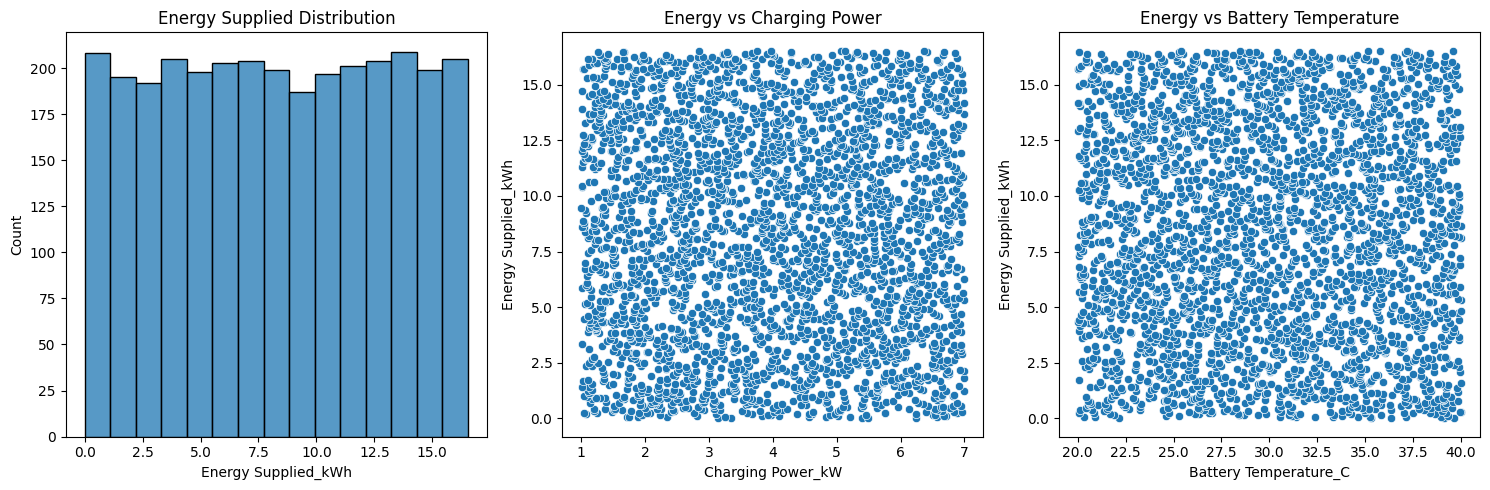

In [5]:
# Exploratory Data Analysis
def perform_eda(df):
    """Perform exploratory data analysis on the dataset."""
    # Display basic information about the dataset
    print("\nDataset Info:")
    print(df.info())
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    print("\nBasic Statistics:")
    print(df.describe())
    
    # Create visualizations
    plt.figure(figsize=(15, 5))
    
    # Energy supplied distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='Energy Supplied_kWh')
    plt.title('Energy Supplied Distribution')
    
    # Energy vs Charging Power
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df, x='Charging Power_kW', y='Energy Supplied_kWh')
    plt.title('Energy vs Charging Power')
    
    # Energy vs Battery Temperature
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=df, x='Battery Temperature_C', y='Energy Supplied_kWh')
    plt.title('Energy vs Battery Temperature')
    
    plt.tight_layout()
    plt.show()

perform_eda(df)

In [8]:
# Feature Engineering
def engineer_features(df):
    """Create new features and perform preprocessing."""
    # Extract datetime features
    df['hour'] = df['Timestamp'].dt.hour
    df['day_of_week'] = df['Timestamp'].dt.dayofweek
    df['month'] = df['Timestamp'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Select features for the model
    feature_columns = [
        'Charging Power_kW',
        'Battery Temperature_C',
        'State Of Charge_SoC',
        'Charging_Duration_h',
        'hour',
        'day_of_week',
        'month',
        'is_weekend'
    ]
    
    # Create feature matrix X and target vector y
    X = df[feature_columns].copy()
    y = df['Energy Supplied_kWh'].copy()
    
    # Handle missing values
    # For numeric columns, fill NaN with median
    for column in X.select_dtypes(include=['float64', 'int64']).columns:
        X[column] = X[column].fillna(X[column].median())
    
    # Check if target variable has any NaN values
    y = y.fillna(y.median())
    
    # Print info about the cleaned dataset
    print("\nFeature statistics after cleaning:")
    print(X.describe())
    print("\nNumber of remaining NaN values:")
    print(X.isna().sum())
    
    return X, y

# Run the updated feature engineering
X, y = engineer_features(df)



Feature statistics after cleaning:
       Charging Power_kW  Battery Temperature_C  State Of Charge_SoC  \
count        3007.000000            3007.000000          3007.000000   
mean            3.961007              29.951936            36.580821   
std             1.738271               5.731675             9.588493   
min             1.001000              20.005000            20.000000   
25%             2.454500              25.040000            28.311000   
50%             3.930000              29.921000            36.591000   
75%             5.463000              34.876500            44.957500   
max             6.999000              39.996000            53.076000   

       Charging_Duration_h         hour  day_of_week   month  is_weekend  
count          3007.000000  3007.000000       3007.0  3007.0      3007.0  
mean              2.086806     5.020619          3.0     2.0         0.0  
std               1.205219     1.267161          0.0     0.0         0.0  
min            

In [9]:
# Split data and train model
def train_model(X, y):
    """Split the data and train the Random Forest model."""
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return model, scaler, X_train.columns

model, scaler, feature_names = train_model(X, y)

Mean Squared Error: 0.02
R² Score: 1.00


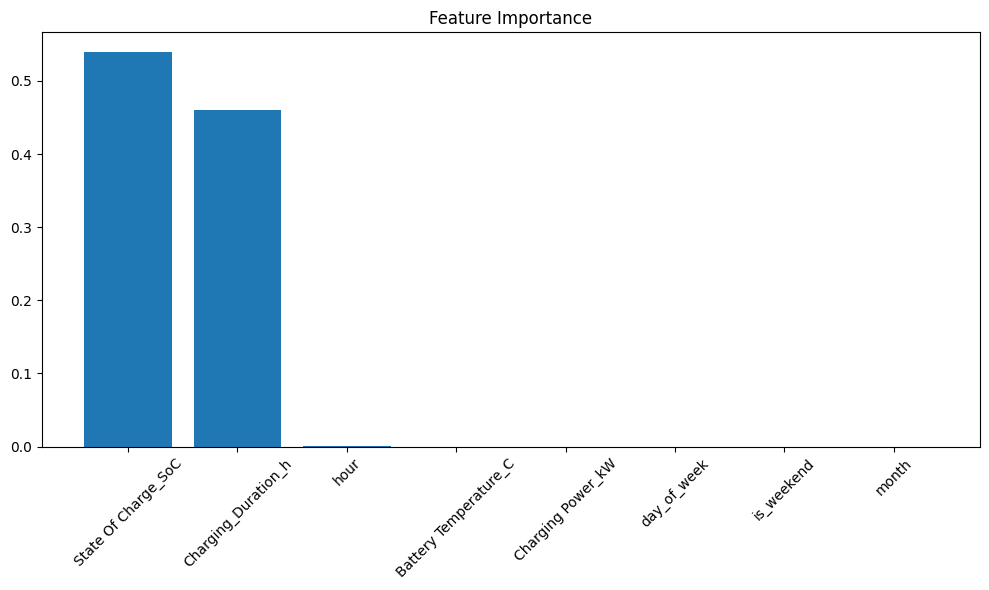

In [10]:
# Plot feature importance
def plot_feature_importance(model, feature_names):
    """Plot the importance of each feature in the model."""
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model, feature_names)

In [11]:
# Save the model and scaler
def save_model(model, scaler, model_path='model.joblib', scaler_path='scaler.joblib'):
    """Save the trained model and scaler to disk."""
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")

save_model(model, scaler)

Model saved to model.joblib
Scaler saved to scaler.joblib


In [ ]:
# Function for making predictions on new data
def predict_energy_consumption(charging_power, battery_temp, soc, duration, timestamp):
    """Make predictions for new charging sessions.
    
    Args:
        charging_power (float): Charging power in kW
        battery_temp (float): Battery temperature in Celsius
        soc (float): State of charge (%)
        duration (float): Charging duration in hours
        timestamp (datetime): Time of the charging session
    
    Returns:
        float: Predicted energy consumption in kWh
    """
    # Create features
    features = pd.DataFrame({
        'Charging Power_kW': [charging_power],
        'Battery Temperature_C': [battery_temp],
        'State Of Charge_SoC': [soc],
        'Charging_Duration_h': [duration],
        'hour': [timestamp.hour],
        'day_of_week': [timestamp.dayofweek],
        'month': [timestamp.month],
        'is_weekend': [1 if timestamp.dayofweek in [5, 6] else 0]
    })
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction = model.predict(features_scaled)[0]
    
    return prediction

# Example prediction
example_timestamp = pd.Timestamp('2025-04-06 14:00:00')
predicted_energy = predict_energy_consumption(
    charging_power=50.0,
    battery_temp=25.0,
    soc=50.0,
    duration=1.0,
    timestamp=example_timestamp
)
print(f"Predicted energy consumption: {predicted_energy:.2f} kWh")